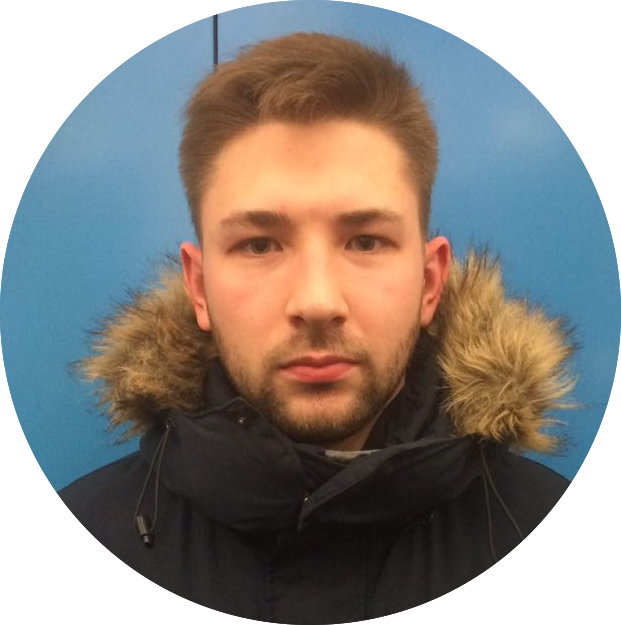

In [114]:
import glob, os
import math
from PIL import Image
from PIL import ImageFilter
from PIL import ImageEnhance
from PIL import PSDraw
from PIL import ImageFilter
from IPython.display import display
import numpy as np
from matplotlib import pyplot as plt
 

im = Image.open("orig/Leha.png")
#im2 = Image.open("img2.jpg")
box = (0, 0, 1920, 1200)
#im2 = im2.crop(box)
display(im)


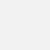

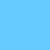

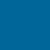

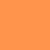

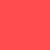

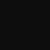

In [115]:
target_colors = [(242, 242, 242), (102, 204, 255), (0, 102, 153), (255, 148, 77), (255, 77, 77), (13, 13, 13)]
for color in target_colors:
    tmp_im = Image.new("RGB", (50, 50), color)
    display(tmp_im)

In [120]:
def pix_distance(x, y):
    return (pow((x[0]-y[0]), 2) + pow((x[1]-y[1]), 2) + pow((x[2]-y[2]), 2))

def find_proper_pixel(pixel, target_pixels):
    dist = []
    for pix in target_pixels:
        dist.append(pix_distance(pixel, pix))
    return dist.index(min(dist))

def split_img_in_colors(im, target_colors): 
    data = im.getdata()
    out_data = []
    out = Image.new("RGB", im.size)
    max_pix = 0
    for pixel in data:
        max_pix = target_colors[find_proper_pixel(pixel, target_colors)]
        out_data.append(max_pix)
    out = Image.new("RGB", im.size)
    out.putdata(out_data)
    return out

def get_separate_colors(im, target_colors):
    data = im.getdata()
    out_data = [[]];
    out = [[]];
    for i in range(len(target_colors) - 1):
        out_data.append([])
        out.append([])
    max_pix = 0
    for pixel in data:
        max_pix = target_colors[find_proper_pixel(pixel, target_colors)]
        for i in range(0, len(target_colors)):
            if target_colors[i] == max_pix:
                out_data[i].append(max_pix)
            else:
                out_data[i].append((255,255,255))
    for i in range(0, len(target_colors)):        
        out[i] = Image.new("RGB", im.size)
        out[i].putdata(out_data[i])
    return out

def get_color_edge(im, rgb):
    out_im = []
    for i in range(len(im)):
        edge = im[i].filter(ImageFilter.FIND_EDGES)
        data = edge.getdata()
        out_data = []
        for pix in data:
            if pix_distance(pix, (0,0,0)) > 10 :
                out_data.append(rgb)
            else:
                out_data.append((255,255,255))
        out = Image.new("RGB", im[i].size)
        out.putdata(out_data)
        out_im.append(out)
    return out_im

def find_color_edges(im, target_colors):
    merged_colors = split_img_in_colors(im, target_colors)
    merged_colors.show()
    merged_colors_smooth = merged_colors.filter(ImageFilter.ModeFilter(size = 20))
    separate_clrs_pics = get_separate_colors(merged_colors_smooth, target_colors)
    edges = get_color_edge(separate_clrs_pics, (255, 0, 0))
    for i in range(len(edges)):
        edges[i].save("output/" + str(i)+".jpg", "JPEG")
    return

In [121]:
find_color_edges(im, target_colors)


In [119]:
merged_colors.show()

In [10]:
separate_clrs_pics_edges[0].save("output/white_edge.jpg", "JPEG")
separate_clrs_pics_edges[1].save("output/blue_edge.jpg", "JPEG")
separate_clrs_pics_edges[2].save("output/dark_blue_edge.jpg", "JPEG")
separate_clrs_pics_edges[3].save("output/orange_edge.jpg", "JPEG")
separate_clrs_pics_edges[4].save("output/red_edge.jpg", "JPEG")
separate_clrs_pics_edges[5].save("output/black_edge.jpg", "JPEG")

In [7]:
separate_clrs_pics[2].show()

In [25]:
merged_colors_smooth.show()

In [9]:
separate_clrs_pics[3].show()
separate_clrs_pics_edges[3].show()